## Import Packages

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import collections
from scipy.stats.mstats import gmean
from itertools import product

## Upload Historical Data 

In [3]:
import io
from google.colab import files
upload = files.upload()

port = pd.read_excel(io.BytesIO(upload['portfolio_data.xlsx']))


Saving portfolio_data.xlsx to portfolio_data (3).xlsx


## DataFrame Modification

In [ ]:
# test different year1

'''
portfolio1 = portfolio[0: 21 * 3 ]
portfolio2 = portfolio[0:252]
portfolio3 = portfolio[0:252*3]
portfolio4 = portfolio[0:252*5]
portfolio5 = portfolio[0:252*8]




'''

In [35]:
# test different year2
import datetime

portfolio = port
for i in range(len(portfolio['Time'])):
  if pd.isnull(portfolio['Time'][i]) == True:
    portfolio = portfolio.drop(i, axis = 0)
  
Time_start =  datetime.datetime(2014, 10, 1)
Time_end = datetime.datetime(2015, 12, 1)

for i in portfolio.index:
  if portfolio.Time[i] > Time_end:
    portfolio = portfolio.drop(i, axis = 0)

  elif portfolio.Time[i] < Time_start:
    portfolio = portfolio.drop(i, axis = 0)
  else:
    continue

In [36]:
portfolio

,Time,LUATTRUU,SPBDEGIT,SPBDENLT,HFRXGL,SPLPEQTY,LDVIX,SPX,NDX,MID,SML,UKX,CAC,DAX,N100,AEX,MXEUMC,M7EUSC,NKY,SSE180,MXEF,SREIUS,HSI,MXEUORE,SREITGL,SNLUR
1852,2015-12-01,2138.32,216.02,211.201,1192.57,117.56,12.52,2102.63,4716.16,1473.14,711.36,6395.65,4914.53,11261.24,955.47,467.32,998.97,359.53,20012.40,7775.92,825.48,300.83,22381.35,178.41,174.93,132.014
1853,2015-11-30,2130.58,215.92,211.151,1189.89,117.19,12.24,2080.41,4664.51,1461.81,706.75,6356.09,4957.60,11382.23,961.87,469.52,1000.13,358.77,19747.47,7728.44,814.30,296.67,21996.42,176.69,172.47,129.030
1855,2015-11-27,2129.97,216.20,211.552,1190.74,116.77,12.28,2090.11,4680.47,1468.98,709.50,6375.15,4930.14,11293.76,959.88,472.17,991.15,354.83,19883.94,7716.34,826.36,299.10,22068.32,177.01,173.51,130.001
1856,2015-11-26,NaN,216.05,211.511,NaN,116.50,NaN,NaN,NaN,NaN,NaN,6393.13,4946.02,11320.77,961.80,472.24,991.23,353.86,19944.41,8133.66,838.09,296.58,22488.94,176.29,172.55,129.569
1857,2015-11-25,2129.48,216.02,211.499,1190.20,116.16,12.23,2088.87,4672.88,1464.25,707.25,6337.64,4892.99,11169.54,951.22,468.07,981.46,351.29,19847.58,8170.49,836.15,296.58,22498.00,175.82,172.53,130.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2014-10-07,2085.10,205.72,204.015,1228.24,115.69,9.92,1935.10,3958.59,1340.29,620.61,6495.58,4209.14,9086.21,809.69,406.51,786.71,265.92,15783.83,NaN,1010.86,268.83,23422.52,137.43,164.17,138.469
2213,2014-10-06,2078.37,205.85,204.082,1235.74,116.84,10.10,1964.82,4016.27,1360.55,630.77,6563.65,4286.52,9209.51,823.35,412.24,799.66,270.27,15890.95,NaN,1010.32,270.94,23315.04,138.69,164.82,139.301
2215,2014-10-03,2075.42,205.88,203.937,1236.54,116.47,10.14,1967.90,4027.31,1364.40,636.31,6527.91,4281.74,NaN,821.95,411.19,798.38,270.22,15708.65,NaN,997.27,270.33,23064.56,138.80,164.10,138.776
2216,2014-10-02,2076.70,205.90,204.120,1230.56,116.00,10.00,1946.17,3985.87,1355.37,632.09,6446.39,4242.67,9195.68,813.72,406.22,788.73,267.34,15661.99,NaN,992.53,268.70,NaN,138.00,164.08,139.951


In [37]:
Portfolio = portfolio.fillna(method= 'bfill')
Portfolio = Portfolio.sort_index (ascending = False)
Portfolio = Portfolio.dropna()
Portfolio = Portfolio.drop(columns = 'Time')

In [38]:
Portfolio

,LUATTRUU,SPBDEGIT,SPBDENLT,HFRXGL,SPLPEQTY,LDVIX,SPX,NDX,MID,SML,UKX,CAC,DAX,N100,AEX,MXEUMC,M7EUSC,NKY,SSE180,MXEF,SREIUS,HSI,MXEUORE,SREITGL,SNLUR
2211,2088.49,205.72,204.026,1227.49,115.77,10.19,1968.89,4041.12,1359.67,632.33,6482.24,4168.12,8995.33,802.97,403.46,778.51,261.94,15595.98,5398.49,998.76,274.77,23263.33,136.53,166.15,138.602
2210,2088.89,205.89,204.049,1219.70,114.48,10.02,1928.21,3969.32,1327.62,617.50,6431.85,4141.45,9005.02,799.29,402.66,774.24,259.93,15478.93,5404.35,1008.33,274.47,23534.53,136.37,166.60,138.307
2209,2090.89,206.04,204.260,1212.78,112.22,9.44,1906.13,3870.86,1304.59,610.90,6339.97,4073.71,8788.81,787.69,395.68,762.22,255.68,15300.55,5366.09,989.87,274.57,23088.54,136.00,165.98,136.559
2207,2090.89,205.77,204.108,1212.78,111.27,9.24,1874.74,3808.00,1288.10,609.39,6366.24,4078.70,8812.43,786.70,394.33,759.46,253.51,15300.55,5335.38,991.49,274.79,23143.38,135.81,166.09,137.052
2206,2101.07,206.31,204.794,1205.92,111.00,9.23,1877.70,3810.45,1300.27,616.68,6392.68,4088.25,8825.21,787.88,393.30,762.14,254.33,14936.51,5313.10,992.08,279.32,23047.97,135.05,167.59,134.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,2129.48,216.02,211.499,1190.20,116.16,12.23,2088.87,4672.88,1464.25,707.25,6337.64,4892.99,11169.54,951.22,468.07,981.46,351.29,19847.58,8170.49,836.15,296.58,22498.00,175.82,172.53,130.485
1856,2129.48,216.05,211.511,1190.20,116.50,12.23,2088.87,4672.88,1464.25,707.25,6393.13,4946.02,11320.77,961.80,472.24,991.23,353.86,19944.41,8133.66,838.09,296.58,22488.94,176.29,172.55,129.569
1855,2129.97,216.20,211.552,1190.74,116.77,12.28,2090.11,4680.47,1468.98,709.50,6375.15,4930.14,11293.76,959.88,472.17,991.15,354.83,19883.94,7716.34,826.36,299.10,22068.32,177.01,173.51,130.001
1853,2130.58,215.92,211.151,1189.89,117.19,12.24,2080.41,4664.51,1461.81,706.75,6356.09,4957.60,11382.23,961.87,469.52,1000.13,358.77,19747.47,7728.44,814.30,296.67,21996.42,176.69,172.47,129.030


## Upload Type List and weight bar

In [15]:
upload = files.upload()
df = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ListTypes')
ByType = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByType')
ByRegion_Eq = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByRegion_Eq')
ByUsCap = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByUsCap')
ByEuCap = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByEuCap')
ByRegion_Fi = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByRegion_Fi')
ByRegion_Reits = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByRegion_Reits')
ByType_Pe = pd.read_excel(io.BytesIO(upload['Portfolio_weight.xlsx']), sheet_name = 'ByType_Pe')

Category = [ByType, ByRegion_Eq, ByUsCap, ByEuCap, ByRegion_Fi, ByRegion_Reits, ByType_Pe  ]

Saving Portfolio_weight.xlsx to Portfolio_weight.xlsx


In [ ]:
Category_list = {}

for i in Category:

  k = i[i.columns[0]][:-1].tolist()

  Category_list[str(i.columns[0])+ '_list'] = k


Each_Asset_Category = {}
for t in Category_list['Types_list']:
  if t == 'Public Equity':
    PuRegion = product([t], Category_list['Region_Eq_list'])
  elif t == 'Fixed Income':
    FiRegion = product([t], Category_list['Region_Fi_list'])
  elif t == 'REITS':
    ReRegion = product([t], Category_list['Region_Reits_list'])
    
  
FiRegion = [i for i in FiRegion]
PuRegion = [i for i in PuRegion]
ReRegion = [i for i in  ReRegion]


PuRegion_us = []
PuRegion_eu = []
PuRegion_others = []
FiRegion_all = []
ReRegion_all = []

for idx1, idx2 in PuRegion:
  if idx2 == 'US':
    us_name = idx1 + '_' + idx2
    us_name = [i for i in product([us_name], Category_list['Cap_Us_list'])]
    for idus1, idus2 in us_name:
      PuRegion_us.append(idus1 + '_' + idus2)

  elif idx2 == 'EU':
    eu_name = idx1 + '_' + idx2
    eu_name = [i for i in product([eu_name], Category_list['Cap_Eu_list'])]
    for ideu1, ideu2 in eu_name:
      PuRegion_eu.append(ideu1 + '_' + ideu2)

  else:
    Region_Name = idx1 + '_' + idx2
    PuRegion_others.append(Region_Name)



for idx1, idx2 in FiRegion :

  Region_Name = idx1 + '_' + idx2
  FiRegion_all.append(Region_Name)



for idx1, idx2 in ReRegion :

  Region_Name = idx1 + '_' + idx2
  ReRegion_all.append(Region_Name)

Each_Asset_Type = ['PE_PE', "PE_VC", 'PE_HF']
Each_Asset_Type = Each_Asset_Type + ReRegion_all + FiRegion_all + PuRegion_others + PuRegion_eu + PuRegion_us
Each_Asset_Type

In [21]:
Each_Asset_Weight={}

for i in Each_Asset_Type:
  Each_Asset_Weight[i] = [0, 0]
Type_list =[ i for i in Each_Asset_Weight.keys()]

In [22]:
Each_Asset_Weight['REITS_US'][0] = ByType['Lower'][2] * ByRegion_Reits['Lower'][0]
Each_Asset_Weight['REITS_US'][1] = ByType['Upper'][2] * ByRegion_Reits['Upper'][0]
Each_Asset_Weight['REITS_EU'][0] = ByType['Lower'][2] * ByRegion_Reits['Lower'][1]
Each_Asset_Weight['REITS_EU'][1] = ByType['Upper'][2] * ByRegion_Reits['Upper'][1]
Each_Asset_Weight['REITS_Global'][0] = ByType['Lower'][2] * ByRegion_Reits['Lower'][2]
Each_Asset_Weight['REITS_Global'][1] = ByType['Upper'][2] * ByRegion_Reits['Upper'][2]
Each_Asset_Weight['REITS_Netherland'][0] = ByType['Lower'][2] * ByRegion_Reits['Lower'][3]
Each_Asset_Weight['REITS_Netherland'][1] = ByType['Upper'][2] * ByRegion_Reits['Upper'][3]



Each_Asset_Weight['Fixed Income_US'][0] = ByType['Lower'][1] * ByRegion_Fi['Lower'][0]
Each_Asset_Weight['Fixed Income_US'][1] = ByType['Upper'][1] * ByRegion_Fi['Upper'][0]
Each_Asset_Weight['Fixed Income_EU'][0] = ByType['Lower'][1] * ByRegion_Fi['Lower'][1]
Each_Asset_Weight['Fixed Income_EU'][1] = ByType['Upper'][1] * ByRegion_Fi['Upper'][1]
Each_Asset_Weight['Fixed Income_Netherland'][0] = ByType['Lower'][1] * ByRegion_Fi['Lower'][2]
Each_Asset_Weight['Fixed Income_Netherland'][1] = ByType['Upper'][1] * ByRegion_Fi['Upper'][2]



Each_Asset_Weight['PE_VC'][0] = ByType['Lower'][3] * ByType_Pe['Lower'][1]
Each_Asset_Weight['PE_VC'][1] = ByType['Upper'][3] * ByType_Pe['Upper'][1]
Each_Asset_Weight['PE_PE'][0] = ByType['Lower'][3]* ByType_Pe['Lower'][0]
Each_Asset_Weight['PE_PE'][1] = ByType['Upper'][3]* ByType_Pe['Upper'][0]
Each_Asset_Weight['PE_HF'][0] = ByType['Lower'][3]* ByType_Pe['Lower'][2]
Each_Asset_Weight['PE_HF'][1] = ByType['Upper'][3]* ByType_Pe['Upper'][2]

Each_Asset_Weight['Public Equity_ASIA'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][2]
Each_Asset_Weight['Public Equity_ASIA'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][2]
Each_Asset_Weight['Public Equity_EM'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][3]
Each_Asset_Weight['Public Equity_EM'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][3]


Each_Asset_Weight['Public Equity_Netherland'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][4] 
Each_Asset_Weight['Public Equity_Netherland'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][4]

Each_Asset_Weight['Public Equity_EU_Large'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][1] * ByEuCap['Weight'][0]
Each_Asset_Weight['Public Equity_EU_Large'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][1] * ByEuCap['Weight'][0]
Each_Asset_Weight['Public Equity_EU_Middle'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][1] * ByEuCap['Weight'][1]
Each_Asset_Weight['Public Equity_EU_Middle'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][1] * ByEuCap['Weight'][1]
Each_Asset_Weight['Public Equity_EU_Small'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][1] * ByEuCap['Weight'][2]
Each_Asset_Weight['Public Equity_EU_Small'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][1] * ByEuCap['Weight'][2]

Each_Asset_Weight['Public Equity_US_Large'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][0] * ByUsCap['Weight'][0]
Each_Asset_Weight['Public Equity_US_Large'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][0]  * ByUsCap['Weight'][0]
Each_Asset_Weight['Public Equity_US_Middle'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][0]  * ByUsCap['Weight'][1]
Each_Asset_Weight['Public Equity_US_Middle'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][0]  * ByUsCap['Weight'][1]
Each_Asset_Weight['Public Equity_US_Small'][0] = ByType['Lower'][0] * ByRegion_Eq['Lower'][0]  * ByUsCap['Weight'][2]
Each_Asset_Weight['Public Equity_US_Small'][1] = ByType['Upper'][0] * ByRegion_Eq['Upper'][0]  * ByUsCap['Weight'][2]

In [23]:
space = [[] for i in range(len(Type_list))]
Asset_pre_num = dict(zip(Type_list, space))

for i in range(len(df.Bloomberg)):
  if df.Type[i] == 'Fixed Income' and df.Region[i] == 'US':
    Asset_pre_num['Fixed Income_US'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Fixed Income' and df.Region[i] == 'EU':
    Asset_pre_num['Fixed Income_EU'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Fixed Income' and df.Region[i] == 'Netherland':
    Asset_pre_num['Fixed Income_Netherland'].append(df.Bloomberg[i])


  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'US' and df['Sub-Type'][i]=='Large Cap':
    Asset_pre_num['Public Equity_US_Large'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'US' and df['Sub-Type'][i]=='Mid Cap':
    Asset_pre_num['Public Equity_US_Middle'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'US' and df['Sub-Type'][i] =='Small Cap':
    Asset_pre_num['Public Equity_US_Small'].append(df.Bloomberg[i]) 

    
  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'EU' and df['Sub-Type'][i]=='Large Cap':
    Asset_pre_num['Public Equity_EU_Large'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'EU' and df['Sub-Type'][i]=='Mid Cap':
    Asset_pre_num['Public Equity_EU_Middle'].append(df.Bloomberg[i])
  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'EU' and df['Sub-Type'][i]=='Small Cap':
    Asset_pre_num['Public Equity_EU_Small'].append(df.Bloomberg[i]) 

  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'ASIA':
    Asset_pre_num['Public Equity_ASIA'].append(df.Bloomberg[i]) 

  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'EM':
    Asset_pre_num['Public Equity_EM'].append(df.Bloomberg[i]) 

  elif df.Type[i] == 'Public Equity' and df.Region[i] == 'Netherland':
    Asset_pre_num['Public Equity_Netherland'].append(df.Bloomberg[i]) 


  elif df['Sub-Type'][i] == 'Private Equity' :
    Asset_pre_num['PE_PE'].append(df.Bloomberg[i])

  
  elif df['Sub-Type'][i] == 'Venture Capital' :
    Asset_pre_num['PE_VC'].append(df.Bloomberg[i])

  elif df['Sub-Type'][i] == 'Hedge Fund' :
    Asset_pre_num['PE_HF'].append(df.Bloomberg[i])

  elif df['Sub-Type'][i] == 'REITS' and df.Region[i] == 'US' :
      Asset_pre_num['REITS_US'].append(df.Bloomberg[i])
  elif df['Sub-Type'][i] == 'REITS' and df.Region[i] == 'EU' :
      Asset_pre_num['REITS_EU'].append(df.Bloomberg[i])
  elif df['Sub-Type'][i] == 'REITS' and df.Region[i] == 'Netherland' :
      Asset_pre_num['REITS_Netherland'].append(df.Bloomberg[i])
  elif df['Sub-Type'][i] == 'REITS' and df.Region[i] == 'Global' :
      Asset_pre_num['REITS_Global'].append(df.Bloomberg[i])
  
  
  



In [24]:

Asset_num={}
for i in Asset_pre_num:
  Asset_num[i] = len(Asset_pre_num[i])

for i in Type_list:
  low = Each_Asset_Weight[i][0]/Asset_num[i]
  high = Each_Asset_Weight[i][1]/Asset_num[i]
  weight = [low, high]
  Each_Asset_Weight[i] = weight


 


In [25]:
Each_Asset_Weight

{'Fixed Income_EU': [0.020000000000000004, 0.105],
 'Fixed Income_Netherland': [0.03, 0.18],
 'Fixed Income_US': [0.020000000000000004, 0.105],
 'PE_HF': [0.0, 0.15],
 'PE_PE': [0.0, 0.15],
 'PE_VC': [0.0, 0.15],
 'Public Equity_ASIA': [0.015000000000000001, 0.06666666666666667],
 'Public Equity_EM': [0.045000000000000005, 0.2],
 'Public Equity_EU_Large': [0.007875, 0.034999999999999996],
 'Public Equity_EU_Middle': [0.009000000000000001, 0.04000000000000001],
 'Public Equity_EU_Small': [0.0045000000000000005, 0.020000000000000004],
 'Public Equity_Netherland': [0.020000000000000004, 0.1],
 'Public Equity_US_Large': [0.01575, 0.06999999999999999],
 'Public Equity_US_Middle': [0.009000000000000001, 0.04000000000000001],
 'Public Equity_US_Small': [0.0045000000000000005, 0.020000000000000004],
 'REITS_EU': [0.010000000000000002, 0.06],
 'REITS_Global': [0.010000000000000002, 0.06],
 'REITS_Netherland': [0.005000000000000001, 0.045],
 'REITS_US': [0.010000000000000002, 0.06]}

# Top down Weight Optimization

#### Portfolio Performance Definitaion

In [26]:
class stats():
  
  def __init__(self, portfolio, weight = None, rf = 0.02):
    self.portfolio = portfolio
    self.rf = rf
    
    if weight is None:
      self.weight = np.ones(len(self.portfolio.columns))/len(self.portfolio.columns)
    else:
      self.weight = weight


  def basic_stats(self):
    #return and std
    
    
    '''
    cov = 252 * (self.portfolio.pct_change().cov().to_numpy())

    cov_inv = np.linalg.inv(cov)
    std = (cov.diagonal()).round(4)
    self.weight.shape = (24,1)
    std.shape = (24,1)
    p_std = np.sqrt(p_weight * std * p_weight)
    p_std = p_std.sum()
    '''

    returns = (self.portfolio.pct_change() * self.weight).sum(axis = 1).dropna()
    
    p_std = np.std(returns) * ((252) ** 0.5)
    geo_return = gmean(1 + returns)-1
    p_return = ((1 + geo_return) ** 252) -1
    
    
    # MDD
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = -(dd.min())


    #sharpe ratio
    sharpe = (p_return - self.rf)/mdd
   
    
    return p_return, p_std, mdd, sharpe


def performance(portfolio, weight):
  returns, vol, max_drawdown, sharpe_ratio = stats(portfolio, weight).basic_stats()

  
  result = pd.DataFrame(data = [100 * returns,100 * vol, 100 * max_drawdown, sharpe_ratio], 
             index = ['Annual Returns %','Annual Volatility %','Maximum Drawdown %','Sharpe Ratio'],
             columns = ['Portfolio Performance'])
 
  


  

  return result

#### Weight Condition Setting- list transformation

In [27]:

zero = [0 for x in range(len(df.Bloomberg))]


start_weight = pd.DataFrame(data = [zero], columns = df.Bloomberg)
stop_weight = pd.DataFrame(data = [zero], columns = df.Bloomberg)


for i in range(len(df.Bloomberg)):
  for k in Asset_pre_num:
    if df.Bloomberg[i] in Asset_pre_num[k]:

      start_weight[df.Bloomberg[i]] = Each_Asset_Weight[k][0]
      stop_weight[df.Bloomberg[i]]= Each_Asset_Weight[k][1]

start_weight = start_weight.values.tolist()[0]
stop_weight = stop_weight.values.tolist()[0]    

In [28]:
stop_weight

[0.105,
 0.105,
 0.18,
 0.15,
 0.15,
 0.06999999999999999,
 0.06999999999999999,
 0.04000000000000001,
 0.020000000000000004,
 0.034999999999999996,
 0.034999999999999996,
 0.034999999999999996,
 0.034999999999999996,
 0.1,
 0.04000000000000001,
 0.020000000000000004,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.2,
 0.06,
 0.06,
 0.06,
 0.045,
 0.15]

#### Optimization Definition

In [29]:
def Optimization (initial_weight, start_weight,stop_weight, portfolio, start=0.01, end=0.07, step=0.01):

  Result_df = pd.DataFrame.from_dict (data = Each_Asset_Weight, orient = 'index').T
  Result_df['Return'] = 0
  Result_df['Volatility'] = 0
  Result_df['Max_drawdown'] = 0
 
  Result_df = Result_df.drop(axis = 0, index = 0)
  Result_df = Result_df.drop(axis = 0, index = 1)



  for w in np.arange(start, end, step):
    for i in range(len(initial_weight)):
      add_weight = [x for x in initial_weight]
     

      if add_weight[i] + w > stop_weight[i]:
        continue

      else:
        add_weight[i] += w
        

      for k in [x for x in range(len(initial_weight)) if x != i]:
          minus_weight = [x for x in add_weight]
          
          

          if minus_weight[k] -w < start_weight[k]:     ############################ change
            continue

          #if minus_weight[k] < 0.01:
            #continue
          else:
            minus_weight[k] -= w
          
            
          returns, std, mdd, sharpe = stats(portfolio, minus_weight).basic_stats()


          weight5 = np.array(minus_weight)
          
         

          Tick_weight = pd.DataFrame(data = [weight5], columns = df.Bloomberg)  
          
          Final_initial = [0 for i in range(len(Type_list))]
          Final_weight = dict(zip(Type_list, Final_initial))
          

          for i in Tick_weight:
            for key, value in Asset_pre_num.items():
              if i in value:
                Final_weight[key] += round(Tick_weight[i][0], 5)
                

          Final_weight = list(Final_weight.values())
          Final_weight.append(returns)
          Final_weight.append(std)
          Final_weight.append(mdd)
          

          Result_df.loc[len(Result_df)] = Final_weight
  return Result_df

In [30]:
def Optimization2 (initial_weight, start_weight,stop_weight, portfolio, start=0.01, end=0.07, step=0.01):

  Result_df = pd.DataFrame.from_dict (data = Each_Asset_Weight, orient = 'index').T
  Result_df['Return'] = 0
  Result_df['Volatility'] = 0
  Result_df['Max_drawdown'] = 0
 
  Result_df = Result_df.drop(axis = 0, index = 0)
  Result_df = Result_df.drop(axis = 0, index = 1)



  for w in np.arange(start, end, step):
    for i in range(len(initial_weight)):
      add_weight = [x for x in initial_weight]
     


      if add_weight[i] - w < start_weight[i]:   ####################### change
        continue

      #if add_weight[i] - w < 0.01:
        #continue

      else:
        add_weight[i] -= w
        

      for k in [x for x in range(len(initial_weight)) if x != i]:
          minus_weight = [x for x in add_weight]

          if minus_weight[k] + w > stop_weight[k]:
            continue
          
          else:
            minus_weight[k] += w

          

  
            
          returns, std, mdd, sharpe = stats(portfolio, minus_weight).basic_stats()


          weight5 = np.array(minus_weight)
          
         

          Tick_weight = pd.DataFrame(data = [weight5], columns = df.Bloomberg)  
          
          Final_initial = [0 for i in range(len(Type_list))]
          Final_weight = dict(zip(Type_list, Final_initial))
          

          for i in Tick_weight:
            for key, value in Asset_pre_num.items():
              if i in value:
                Final_weight[key] += round(Tick_weight[i][0], 5)
                

          Final_weight = list(Final_weight.values())
          Final_weight.append(returns)
          Final_weight.append(std)
          Final_weight.append(mdd)
          

          Result_df.loc[len(Result_df)] = Final_weight
  return Result_df

#### Start Optimization

In [39]:
start = 0.001
end = 1.00
step = 0.001



weight = df[['Bloomberg','Weight']]

P = pd.DataFrame(data = Portfolio, columns = weight.Bloomberg)
#p_weight = np.ones(len(weight.Bloomberg))
#p_weight = p_weight/len(weight.Bloomberg)

initial_weight = dict(zip(df.Bloomberg, df.Weight))
initial = [i for i in initial_weight.values()]


p_weight = np.array(weight.Weight)

result = Optimization (initial, start_weight, stop_weight, P, start=start, end=end, step=step)
result2 = Optimization2 (initial, start_weight, stop_weight, P, start=start, end=end, step=step)
result3 = pd.concat([result,  result2])
result3 = result3.drop_duplicates()


## Download csv

In [40]:
from google.colab import files
result3.to_csv('201410-201512.csv') 
files.download('201410-201512.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Performance Evaluation

In [ ]:

import datetime

portfolio = port
for i in range(len(portfolio['Time'])):
  if pd.isnull(portfolio['Time'][i]) == True:
    portfolio = portfolio.drop(i, axis = 0)
  
Time_start =  datetime.datetime(2014, 10, 1)
Time_end = datetime.datetime(2015, 12, 1)

for i in portfolio.index:
  if portfolio.Time[i] > Time_end:
    portfolio = portfolio.drop(i, axis = 0)

  elif portfolio.Time[i] < Time_start:
    portfolio = portfolio.drop(i, axis = 0)
  else:
    continue



Portfolio = portfolio.fillna(method= 'bfill')
Portfolio = Portfolio.sort_index (ascending = False)
Portfolio = Portfolio.dropna()
Portfolio = Portfolio.drop(columns = 'Time')




P = pd.DataFrame(data = Portfolio, columns = weight.Bloomberg)
FinalWeight = []
performance(portfolio, weight)

In [ ]:
################### testing

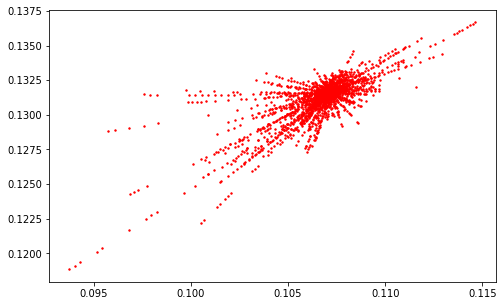

In [ ]:
#result4 =  result3.sample(n = 2500)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(x = result4.Return, y = result4.Volatility, s = 2, c = 'r')

In [ ]:
test_weight

array([0.08238636, 0.03551136, 0.13068182, 0.046875  , 0.11505682,
       0.07670455, 0.07954545, 0.02982955, 0.05823864, 0.10653409,
       0.09943182, 0.13920455])

In [43]:
import numpy as np


T_df = pd.DataFrame.from_dict (data = Each_Asset_Weight, orient = 'index').T
T_df['Return'] = 0
T_df['Volatility'] = 0
T_df['Max_drawdown'] = 0
T_df = T_df.drop(axis = 0, index = 0)
T_df = T_df.drop(axis = 0, index = 1)



times = 10000


for i in range(times):
  samples = np.random.randint(1, 1000, 25)              
  total = np.sum(samples)                                                            
  normalized = samples/total
  test_weight = [normalized]

  weight8 = normalized
  returns, std, mdd, sharpe = stats(P, weight8).basic_stats()

  if sharpe <0:
    continue


  Tick_weight = pd.DataFrame(data = [weight8], columns = df.Bloomberg)  
  
  Final_initial = [0 for i in range(len(Type_list))]
  Final_weight = dict(zip(Type_list, Final_initial))
  

  for i in Tick_weight:
    for key, value in Asset_pre_num.items():
      if i in value:
        Final_weight[key] += round(Tick_weight[i][0], 5)
        

  Final_weight = list(Final_weight.values())
  Final_weight.append(returns)
  Final_weight.append(std)
  Final_weight.append(mdd)
  T_df.loc[len(T_df)] = Final_weight


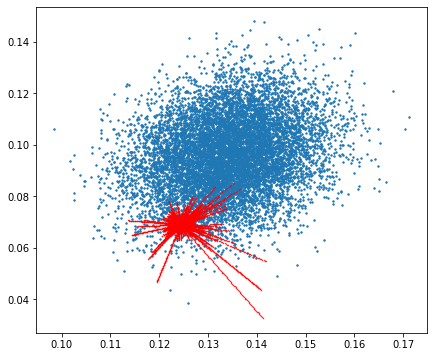

In [47]:
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6)
plt.scatter(x = T_df.Volatility, y = T_df.Return, s = 2)
plt.scatter(x = result3.Volatility, y = result3.Return, s = 0.2, c = 'r')
plt.show()

In [ ]:
from google.colab import files
T_df.to_csv('T.csv') 
files.download('T.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Final = pd.concat([result3,  T_df])
Final = Final.drop_duplicates()

In [ ]:
from google.colab import files
Final.to_csv('final.csv') 
files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>